# Business Case

## PROJECT GOAL: 
**1. Data exploration insights – Sales effectiveness.**

**2. ML model to predict the Lead Category (High Potential , Low Potential)**

In [1]:
# Importing Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
data = pd.read_csv('data.csv')

In [3]:
# first five records of our dataframe
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [4]:
data.head(20)

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
5,14-11-2018 07:33,NaN,Website,XXXXXXX,rXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
6,14-11-2018 05:58,NaN,Website,XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
7,14-11-2018 05:49,NaN,Website,XXXXXXX,rXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
8,14-11-2018 05:40,NaN,Website,078XXXXXXX,DXXXXXXXheblue.com,Sales-Agent-10,NaN,Mode-5,Open
9,14-11-2018 05:06,NaN,Website,XXXXXXX,jXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [5]:
data.shape

(7422, 9)

In [6]:
data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25.0,Website,NaN,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [7]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [8]:
data.Source.value_counts()

Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: Source, dtype: int64

In [9]:
data.Location.value_counts()

Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

# Domain Analysis

let's perform domain analysis on each of the features in our dataset to gain a better understanding of their significance and potential relevance to the project:

1. **Created**:
   - Domain Analysis: This represents the date when a lead or opportunity was created.
   - Significance: The timestamp can be valuable for time-based analysis, understanding seasonality, and measuring the effectiveness of lead generation efforts over time.

2. **Product_ID**:
   - Domain Analysis: It represents the product or service associated with the lead.
   - Significance: The type of product or service might impact lead quality, as some products may have higher demand or appeal to specific customer segments.

3. **Source**:
   - Domain Analysis: This feature indicates the source through which leads were acquired (e.g., website, Call, Live Chat-Direct).
   - Significance: Knowing the lead source can help assess the effectiveness of different marketing channels and campaigns in generating high-quality leads.

4. **Mobile**:
   - Domain Analysis: the lead provided a mobile number.
   - Significance: Mobile number availability could be related to lead quality and the ability to contact and convert leads.

5. **EMAIL**:
   - Domain Analysis: lead provided an email address.
   - Significance: Similar to mobile, email availability is crucial for communication and lead conversion.

6. **Sales_Agent**:
   - Domain Analysis: Represents the sales agent responsible for the lead.
   - Significance: The effectiveness of different sales agents in converting leads can be assessed, helping optimize the sales team's performance.

7. **Location**:
   - Domain Analysis: Indicates the geographical location associated with the lead.
   - Significance: Location data may be important for understanding regional variations in lead quality and sales performance.

8. **Delivery_Mode**:
   - Domain Analysis: Describes the mode of product/service delivery.
   - Significance: This could be relevant for assessing lead quality, as some delivery modes might be preferred by specific customer segments.

9. **Status**:
   - Domain Analysis: Represents the current status of the lead or opportunity.
   - Significance: Lead status is crucial for evaluating the success of sales efforts and conversion rates.

In [10]:
data.Sales_Agent.value_counts()

Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
Sales-Agent-1        4
Name: Sales_Agent, dtype: int64

In [11]:
data['Status'].value_counts()

Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: Status, dtype: int64

In [12]:
data.Delivery_Mode.value_counts()

Mode-5    2975
Mode-1    2627
Mode-3    1688
Mode-4     121
Mode-2      11
Name: Delivery_Mode, dtype: int64

# Exploratory data Analysis

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7422 non-null   object 
 1   Product_ID     7364 non-null   float64
 2   Source         7405 non-null   object 
 3   Mobile         5612 non-null   object 
 4   EMAIL          7422 non-null   object 
 5   Sales_Agent    7399 non-null   object 
 6   Location       7364 non-null   object 
 7   Delivery_Mode  7422 non-null   object 
 8   Status         7422 non-null   object 
dtypes: float64(1), object(8)
memory usage: 522.0+ KB


In [14]:
data.describe()

,Product_ID
count,7364.000000
mean,15.947311
std,6.072937
min,0.000000
25%,12.000000
50%,18.000000
75%,19.000000
max,28.000000


In [15]:
data.describe(include = 'O')

,Created,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7405,5612,7422,7399,7364,7422,7422
unique,6752,25,486,883,12,17,5,11
top,26-09-2018 11:30,Call,XXXXXXX,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,2547,222,1701,1500,2500,2975,1536


### Univariate Analysis

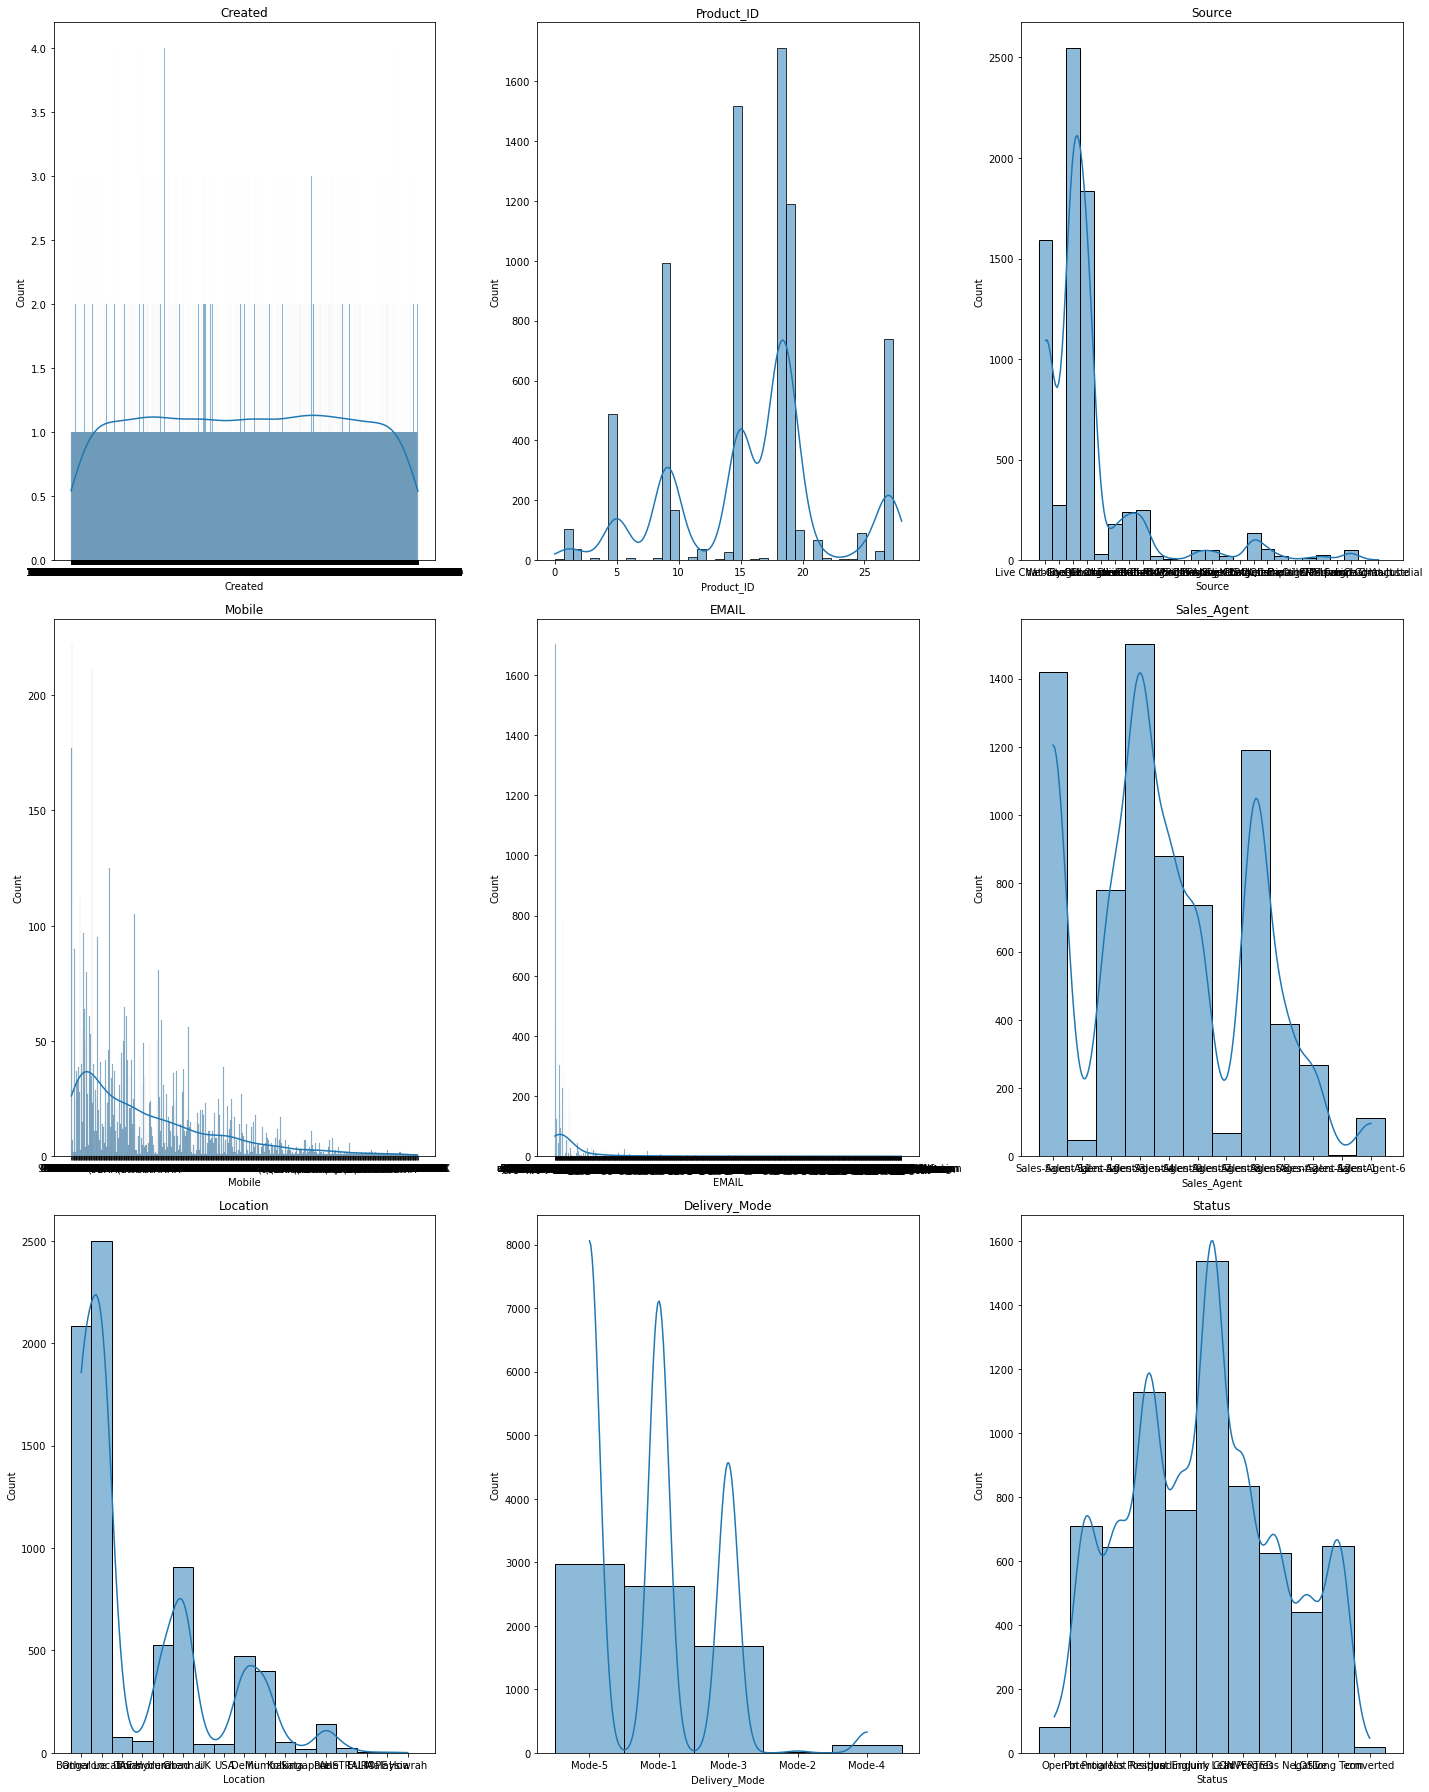

In [16]:
plt.figure(figsize = (20,25))
plotnumber = 1
for column in data:
    ax = plt.subplot(3,3,plotnumber)
    sns.histplot(data[column], kde = True )
    plt.title(column)
    plotnumber += 1
plt.tight_layout()
plt.show()

**Insights from Univariate Analysis**

Not all the data follows a normal distribution.

**Product_ID:** in this feature Product_ID number 18.0 have the highest number of records, Product_ID number 15.0 have second highest number of records and Product_ID number 19.0 have third highest number records and so on.

**Source:** Maximum number of leads we got from call, second highest number of leads we got from Live chat-direct and third is from website and so on.

**Sales_Agent:** Agent number 4 has the highest number of records, followed by agent number 11 in the second position, and agent number 5 in the third position. This suggests that Agent 4 has the most extensive set of records, Agent 11 has the second-highest, and Agent 5 comes in third, with a gradually decreasing number of records for other agents as you move down the list.

**Location:** other Locations have the maximum number of records that is 2500 records having other locations, second is Bangalore and third is Chennai and so on.

**Delivary_Mode:** There are 5 types of delivery modes are there, fifth one is having the highest number of records, second is second type of delivary_mode and second one is having very less number of records 

**Status:** Maximum number of leads we get is Junk Lead whose count is 1536 number of records, Second is like Not Responding and so on.

## Bivariate Analysis

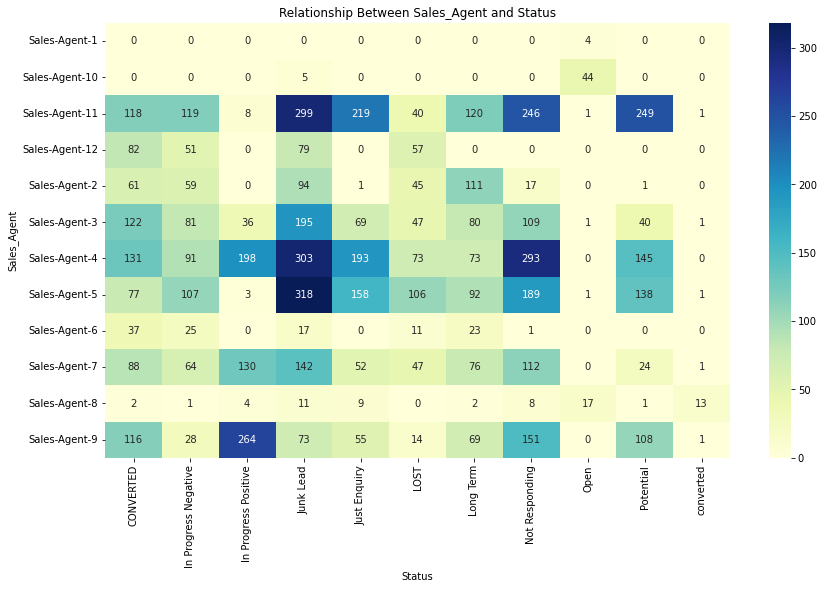

In [17]:
# Create the heatmap
plt.figure(figsize=(14, 8))
bivariate_table = pd.crosstab(data['Sales_Agent'], data['Status'])
sns.heatmap(bivariate_table, annot=True, cmap='YlGnBu',fmt = 'd')
plt.title('Relationship Between Sales_Agent and Status')
plt.show()

**Insights**

1. **Top Performers**: Most of the sales and the highest number of records are associated with four agents: Agent-4, Agent-5, Agent-11, and Agent-9. These agents have excelled based on this data.


2. **Moderate Performers**: Agents Agent-12, Agent-2, Agent-3, and Agent-7 fall into this category. Among them, Agent-3 has performed relatively better compared to the other three in this group.


3. **Below-Average Performers**: Agents Agent-6 and Agent-8 are considered below-average performers. Agent-6 is slightly better than Agent-8 in this regard.


4. **Low Activity**: Agents 1 and 10 appear to have low or insignificant activity or performance.

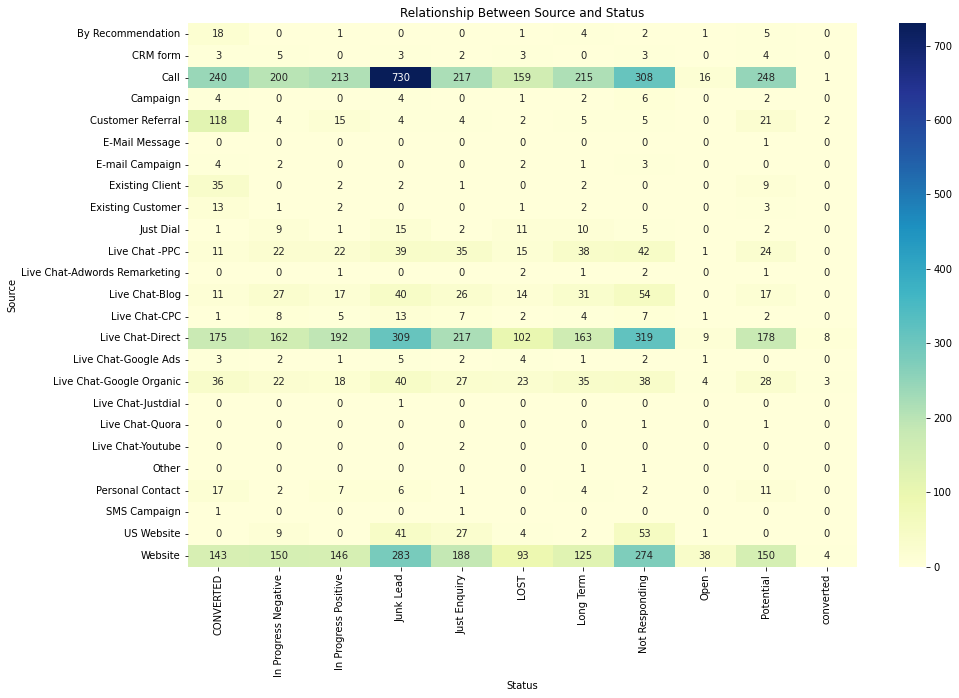

In [18]:
plt.figure(figsize =(15,10))
bivariate_table = pd.crosstab(data['Source'], data['Status'])
sns.heatmap(bivariate_table, annot=True, cmap='YlGnBu',fmt='d')
plt.title('Relationship Between Source and Status')
plt.show()

**Insights**


1. **Major Lead Sources**: The majority of leads come from only three sources: Website, Live Chat-Direct, and Call.


2. **Effective Source**: The data suggests that 'Customer Referral' is a potent source for generating positive leads. This is evident because most of the records are associated with positive leads or reports in progress, and there are very few records related to negative leads.


3. **Moderate Sources**: Several sources fall into the moderate category, including 'Live Chat-Google Organic,' 'Live Chat -PPC,' 'Live Chat-Blog,' 'Existing Client,' 'Existing Customer,' and 'Personal Contact.'


4. **Positive Leads from Recommendations**: 'By Recommendation' is another source that consistently provides good positive leads.


5. **Limited Response from 'US Website'**: Although 'US Website' doesn't yield positive leads currently, it does generate some response. There's potential for positive leads in the future.


6. **Ineffective Sources**: Sources like 'Live Chat-Justdial,' 'SMS Campaign,' 'E-Mail Message,' 'Live Chat-Quora,' 'Other,' 'Live Chat-Youtube,' and 'Live Chat-Adwords Remarketing' do not appear to be significant for obtaining positive leads. Investing in these sources for positive leads seems unproductive or useless.

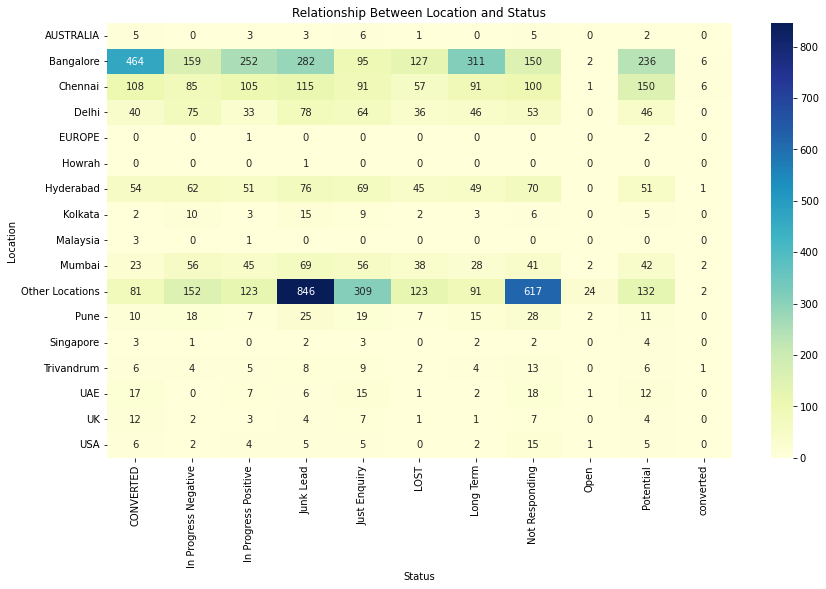

In [19]:
plt.figure(figsize =(14,8))
bivariate_table = pd.crosstab(data['Location'], data['Status'])
sns.heatmap(bivariate_table, annot=True, cmap='YlGnBu',fmt='d')
plt.title('Relationship Between Location and Status')
plt.show()

**Insights**


1. **Most Records Concentrated**: The majority of records are linked to only four locations: 'Bangalore,' 'Other Locations,' 'Chennai,' and 'Hyderabad.' Notably, 'Bangalore' stands out as the source of the highest number of positive leads.


2. **Moderate Locations**: Locations such as 'Delhi,' 'Mumbai,' 'Pune,' and 'UAE' fall into the moderate category. These locations also have a moderate number of positive leads.


3. **Promising Locations**: Locations like 'UK,' 'USA,' 'Australia,' and 'Malaysia' show promising results with a significant number of positive leads and relatively fewer negative leads.


4. From Europe and Howrah there is no response or we can say very very less number of records are related to those Locations

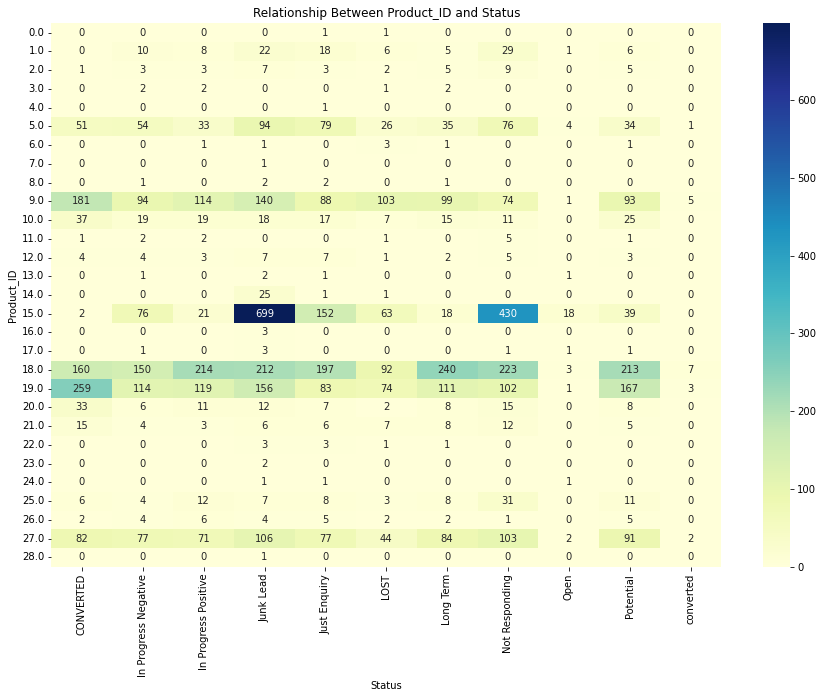

In [20]:
plt.figure(figsize =(15,10))
bivariate_table = pd.crosstab(data['Product_ID'], data['Status'])
sns.heatmap(bivariate_table, annot=True, cmap='YlGnBu',fmt='d')
plt.title('Relationship Between Product_ID and Status')
plt.show()

**Insights**
1. Product IDs 18 and 19 have not only generated the highest sales but also account for the largest share of entries in this dataset.

2. With the exception of Product IDs 5, 9, 18, 19, 20, and 27, the remaining products appear to have limited significance, largely consisting of low-potential leads and unrelated data.

3. Notably, Product ID 15 has received the highest number of junk leads among all the products.

## Data Pre Processing

In [21]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [22]:
data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25.0,Website,NaN,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7422 non-null   object 
 1   Product_ID     7364 non-null   float64
 2   Source         7405 non-null   object 
 3   Mobile         5612 non-null   object 
 4   EMAIL          7422 non-null   object 
 5   Sales_Agent    7399 non-null   object 
 6   Location       7364 non-null   object 
 7   Delivery_Mode  7422 non-null   object 
 8   Status         7422 non-null   object 
dtypes: float64(1), object(8)
memory usage: 522.0+ KB


In [24]:
data.Delivery_Mode.value_counts()

Mode-5    2975
Mode-1    2627
Mode-3    1688
Mode-4     121
Mode-2      11
Name: Delivery_Mode, dtype: int64

In [25]:
data.Status.value_counts()

Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: Status, dtype: int64

In [26]:
data.duplicated().sum()

2

There are 2 duplicate records are present in this dataset

In [27]:
# Dropping Duplicate records
data.drop_duplicates(inplace=True)

In [28]:
data.duplicated().sum()

0

In [29]:
# Checking for null values
data.isnull().sum()

Created             0
Product_ID         56
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           56
Delivery_Mode       0
Status              0
dtype: int64

In [30]:
ax = data['Product_ID'].isnull()

In [31]:
ax

0        True
1        True
2        True
3        True
4        True
        ...  
7417    False
7418    False
7419    False
7420    False
7421    False
Name: Product_ID, Length: 7420, dtype: bool

In [32]:
# view tha records that contain null values in Feature 'product_ID'
data[ax]

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
5,14-11-2018 07:33,NaN,Website,XXXXXXX,rXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
6,14-11-2018 05:58,NaN,Website,XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
7,14-11-2018 05:49,NaN,Website,XXXXXXX,rXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
8,14-11-2018 05:40,NaN,Website,078XXXXXXX,DXXXXXXXheblue.com,Sales-Agent-10,NaN,Mode-5,Open
9,14-11-2018 05:06,NaN,Website,XXXXXXX,jXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


* You can notice that when there's a missing value in the "Product_ID," there's also a missing value in the "Location."

* Since we have 7000+ records so we can drop the records which contain null values to clean the data 

In [33]:
data.isnull().sum()

Created             0
Product_ID         56
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           56
Delivery_Mode       0
Status              0
dtype: int64

In [34]:
# dropping the records containing null values
data = data.dropna(subset=['Product_ID'])

In [35]:
# filling null values with backword fill method in source feature
data['Source'].fillna(method = 'bfill',inplace=True)

In [36]:
# filling null values with backword fill method in Sales_Agent feature
data['Sales_Agent'].fillna(method = 'bfill',inplace=True)

In [37]:
# filling null values with backword fill method in Location feature
data['Location'].fillna(method = 'bfill',inplace=True)

In [38]:
data.isnull().sum()

Created             0
Product_ID          0
Source              0
Mobile           1809
EMAIL               0
Sales_Agent         0
Location            0
Delivery_Mode       0
Status              0
dtype: int64

**Now we can see that there is no null value present in our dataframe except in mobile column**

**High Potential:**
1. "CONVERTED": Leads that have successfully converted into sales or have achieved the desired outcome.
2. "In Progress Positive": Leads that are actively being worked on and have a positive outlook toward conversion.
3. "converted" : similar to "CONVERTED" but in lowercase
4. "Long Term": Leads that may have potential but are expected to convert over a longer time horizon.
5. "Potential": Leads that are considered to have potential for conversion but have not reached a definitive status yet.

**Low Potential:**
1. "Junk Lead": Leads that are typically considered low-quality or not relevant for conversion.
2. "Not Responding": Leads that have not responded to previous attempts at communication or engagement and are often challenging to convert.
3. "LOST": Leads that have been lost, meaning they did not convert into sales.
4. "Just Enquiry": Leads that have shown some initial interest but may not have progressed further in the sales process.
5. "In Progress Negative": Leads that are actively being worked on but face challenges or are less likely to convert.
6. "Open": Leads with an "Open" status that requires further clarification or categorization.

In [39]:
data.Status.value_counts()

Junk Lead               1534
Not Responding          1127
CONVERTED                834
Just Enquiry             757
Potential                708
Long Term                645
In Progress Positive     642
In Progress Negative     626
LOST                     440
Open                      33
converted                 18
Name: Status, dtype: int64

In [40]:
# Create a mapping dictionary for categorization
status_mapping = {
    'In Progress Positive': 'High Potential',
    'CONVERTED': 'High Potential',
    'converted': 'High Potential',
    'Not Responding': 'Low Potential',
    'Potential': 'High Potential',
    'Just Enquiry': 'Low Potential',
    'Junk Lead': 'Low Potential',
    'Open': 'Low Potential',
    'In Progress Negative': 'Low Potential',
    'Long Term': 'High Potential',
    'LOST': 'Low Potential'
}

# Apply the mapping to create a new 'Lead Category' column
data['Lead Category'] = data['Status'].map(status_mapping)

In [41]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Lead Category
18,13-11-2018 18:51,9.0,Live Chat-Google Organic,971XXXXXXX,mXXXXXXX@gmail.com,Sales-Agent-3,Bangalore,Mode-1,Potential,High Potential
19,13-11-2018 18:48,19.0,Call,701XXXXXXX,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Potential,High Potential
24,13-11-2018 17:09,18.0,Website,790XXXXXXX,gXXXXXXX@gmail.com,Sales-Agent-11,Trivandrum,Mode-1,Potential,High Potential
25,13-11-2018 16:49,15.0,Website,970XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-7,Hyderabad,Mode-1,Not Responding,Low Potential
26,13-11-2018 16:37,18.0,Call,740XXXXXXX,nXXXXXXX@gmail.com,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive,High Potential


## 1. Created

In [42]:
data['Created'] = pd.to_datetime(data['Created'])

In [43]:
# Extracting valuable information from created feature
data['Month'] = data['Created'].dt.month
data['Day'] = data['Created'].dt.day

## 2. Source

In [44]:
data.Source.value_counts()

Call                             2546
Live Chat-Direct                 1833
Website                          1555
Live Chat-Google Organic          275
Live Chat -PPC                    250
Live Chat-Blog                    238
Customer Referral                 180
US Website                        134
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: Source, dtype: int64

In [45]:
# This feature contains total 25 labels in that synthetic search OR inquery of customer in different category
# making groups and putting them in one group of similar labels as we can see below.

# first group - Live chat
data.Source.replace(['Live Chat-Direct','Live Chat-Google Organic','Live Chat -PPC','Live Chat-Blog','Live Chat-CPC',
                    'Live Chat-Google Ads','Live Chat-Adwords Remarketing','Live Chat-Quora','Live Chat-Youtube',
                    'Live Chat-Justdial'],'live chat',inplace=True)

# second group - new client
data.Source.replace(['Existing Client','Personal Contact','CRM form','Existing Customer'],'existing client',inplace=True)

# 3rd group - website
data.Source.replace(['US Website','Just Dial'],'social',inplace=True)

# 4th group - recommendation
data.Source.replace(['Customer Referral','By Recommendation'],'recommendation',inplace=True)

# 5th group - campaign
data.Source.replace(['Campaign','E-mail Campaign','SMS Campaign','E-Mail Message'],'campaign',inplace=True)

In [46]:
data.Source.value_counts()

live chat          2679
Call               2546
Website            1555
recommendation      212
social              190
existing client     146
campaign             34
Other                 2
Name: Source, dtype: int64

In [47]:
source = pd.get_dummies(data['Source'],drop_first = True)

In [48]:
data = pd.concat([data,source],axis = 1)

## 3. SalesAgent

In [49]:
SalesAgents = pd.get_dummies(data['Sales_Agent'],drop_first = True)

In [50]:
SalesAgents

,Sales-Agent-11,Sales-Agent-12,Sales-Agent-2,Sales-Agent-3,Sales-Agent-4,Sales-Agent-5,Sales-Agent-6,Sales-Agent-7,Sales-Agent-8,Sales-Agent-9
18,0,0,0,1,0,0,0,0,0,0
19,0,0,0,0,1,0,0,0,0,0
24,1,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,1,0,0
26,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
7417,0,0,0,0,0,0,1,0,0,0
7418,0,1,0,0,0,0,0,0,0,0
7419,1,0,0,0,0,0,0,0,0,0
7420,0,0,0,0,1,0,0,0,0,0


In [51]:
data = pd.concat([data,SalesAgents],axis = 1)

## 4. Location

In [52]:
data.Location.value_counts()

Other Locations    2497
Bangalore          2085
Chennai             911
Hyderabad           528
Delhi               472
Mumbai              401
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

In [53]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Lead Category,...,Sales-Agent-11,Sales-Agent-12,Sales-Agent-2,Sales-Agent-3,Sales-Agent-4,Sales-Agent-5,Sales-Agent-6,Sales-Agent-7,Sales-Agent-8,Sales-Agent-9
18,2018-11-13 18:51:00,9.0,live chat,971XXXXXXX,mXXXXXXX@gmail.com,Sales-Agent-3,Bangalore,Mode-1,Potential,High Potential,...,0,0,0,1,0,0,0,0,0,0
19,2018-11-13 18:48:00,19.0,Call,701XXXXXXX,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Potential,High Potential,...,0,0,0,0,1,0,0,0,0,0
24,2018-11-13 17:09:00,18.0,Website,790XXXXXXX,gXXXXXXX@gmail.com,Sales-Agent-11,Trivandrum,Mode-1,Potential,High Potential,...,1,0,0,0,0,0,0,0,0,0
25,2018-11-13 16:49:00,15.0,Website,970XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-7,Hyderabad,Mode-1,Not Responding,Low Potential,...,0,0,0,0,0,0,0,1,0,0
26,2018-11-13 16:37:00,18.0,Call,740XXXXXXX,nXXXXXXX@gmail.com,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive,High Potential,...,0,0,0,0,0,0,0,1,0,0


In [54]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Location']=label_encoder.fit_transform(data['Location'])

## 5. Delivery_mode

In [55]:
data['Delivery_Mode'].replace({'Mode-1':1,'Mode-2':2,'Mode-3':3,'Mode-4':4,'Mode-5':5},inplace=True)

## 6. Lead Category

In [56]:
data['Lead Category'].replace({'High Potential':1,'Low Potential':0},inplace=True)

In [58]:
pd.set_option('display.max_columns',None)
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Lead Category,Month,Day,Other,Website,campaign,existing client,live chat,recommendation,social,Sales-Agent-11,Sales-Agent-12,Sales-Agent-2,Sales-Agent-3,Sales-Agent-4,Sales-Agent-5,Sales-Agent-6,Sales-Agent-7,Sales-Agent-8,Sales-Agent-9
18,2018-11-13 18:51:00,9.0,live chat,971XXXXXXX,mXXXXXXX@gmail.com,Sales-Agent-3,1,1,Potential,1,11,13,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
19,2018-11-13 18:48:00,19.0,Call,701XXXXXXX,#VALUE!,Sales-Agent-4,10,5,Potential,1,11,13,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
24,2018-11-13 17:09:00,18.0,Website,790XXXXXXX,gXXXXXXX@gmail.com,Sales-Agent-11,13,1,Potential,1,11,13,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
25,2018-11-13 16:49:00,15.0,Website,970XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-7,6,1,Not Responding,0,11,13,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
26,2018-11-13 16:37:00,18.0,Call,740XXXXXXX,nXXXXXXX@gmail.com,Sales-Agent-7,1,1,In Progress Positive,1,11,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [59]:
# dripping unwanted features for further analysis
data.drop('Status',inplace = True,axis = 1)
data.drop('Sales_Agent',inplace = True,axis = 1)
data.drop('EMAIL',inplace = True,axis = 1)
data.drop('Mobile',inplace=True,axis = 1)
data.drop('Created',inplace = True, axis = 1)
data.drop('Source',axis =1 , inplace = True)

In [60]:
data.shape

(7364, 23)

In [61]:
data['Product_ID'] = data['Product_ID'].astype(int)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7364 entries, 18 to 7421
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Product_ID       7364 non-null   int32
 1   Location         7364 non-null   int32
 2   Delivery_Mode    7364 non-null   int64
 3   Lead Category    7364 non-null   int64
 4   Month            7364 non-null   int64
 5   Day              7364 non-null   int64
 6   Other            7364 non-null   uint8
 7   Website          7364 non-null   uint8
 8   campaign         7364 non-null   uint8
 9   existing client  7364 non-null   uint8
 10  live chat        7364 non-null   uint8
 11  recommendation   7364 non-null   uint8
 12  social           7364 non-null   uint8
 13  Sales-Agent-11   7364 non-null   uint8
 14  Sales-Agent-12   7364 non-null   uint8
 15  Sales-Agent-2    7364 non-null   uint8
 16  Sales-Agent-3    7364 non-null   uint8
 17  Sales-Agent-4    7364 non-null   uint8
 18  Sales-A

In [63]:
data.isnull().sum()

Product_ID         0
Location           0
Delivery_Mode      0
Lead Category      0
Month              0
Day                0
Other              0
Website            0
campaign           0
existing client    0
live chat          0
recommendation     0
social             0
Sales-Agent-11     0
Sales-Agent-12     0
Sales-Agent-2      0
Sales-Agent-3      0
Sales-Agent-4      0
Sales-Agent-5      0
Sales-Agent-6      0
Sales-Agent-7      0
Sales-Agent-8      0
Sales-Agent-9      0
dtype: int64

In [64]:
# Splitting the data into two variables that is input and output variables
x = data.drop('Lead Category',axis = 1)
y = data['Lead Category']

In [65]:
y.value_counts()

0    4517
1    2847
Name: Lead Category, dtype: int64

In [66]:
y

18      1
19      1
24      1
25      0
26      1
       ..
7417    0
7418    0
7419    0
7420    0
7421    1
Name: Lead Category, Length: 7364, dtype: int64

In [67]:
#we can see that this is an imbalanced dataset 
# balancing the data
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE()
print('Before balancing',Counter(y))
x_sm,y_sm = sm.fit_resample(x,y)
print('After balancing',Counter(y_sm))

Before balancing Counter({0: 4517, 1: 2847})
After balancing Counter({1: 4517, 0: 4517})


In [68]:
# splitting the data using train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size = 0.2,random_state = 42)

## Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [71]:
y_pred = model.predict(x_test)
y_pred1 = model.predict(x_train)

In [72]:
from sklearn.metrics import classification_report
# Testing Accuracy
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       914
           1       0.73      0.70      0.71       893

    accuracy                           0.72      1807
   macro avg       0.72      0.72      0.72      1807
weighted avg       0.72      0.72      0.72      1807



In [73]:
# Training Accuracy
print(classification_report(y_train,y_pred1))

              precision    recall  f1-score   support

           0       0.71      0.77      0.73      3603
           1       0.75      0.68      0.71      3624

    accuracy                           0.72      7227
   macro avg       0.73      0.72      0.72      7227
weighted avg       0.73      0.72      0.72      7227



## Naive Bayes

In [74]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(x_train,y_train)
y_pred_NB = NB.predict(x_test)
y_pred_NBtrain = NB.predict(x_train)

In [75]:
# Testing score
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       914
           1       0.66      0.70      0.68       893

    accuracy                           0.67      1807
   macro avg       0.67      0.67      0.67      1807
weighted avg       0.67      0.67      0.67      1807



In [76]:
# Predicting for training data
y_pred_NB1 = NB.predict(x_train)

In [77]:
# Training Accuracy
print(classification_report(y_train,y_pred_NB1))

              precision    recall  f1-score   support

           0       0.67      0.66      0.67      3603
           1       0.67      0.68      0.67      3624

    accuracy                           0.67      7227
   macro avg       0.67      0.67      0.67      7227
weighted avg       0.67      0.67      0.67      7227



## Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred_dtc = dtc.predict(x_test)

In [79]:
# Testing score
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       914
           1       0.70      0.72      0.71       893

    accuracy                           0.71      1807
   macro avg       0.71      0.71      0.71      1807
weighted avg       0.71      0.71      0.71      1807



In [80]:
# Predicting for training data
y_pred_dtctrain = dtc.predict(x_train)

In [81]:
# Training Accuracy
print(classification_report(y_train,y_pred_dtctrain))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3603
           1       1.00      0.97      0.99      3624

    accuracy                           0.99      7227
   macro avg       0.99      0.99      0.99      7227
weighted avg       0.99      0.99      0.99      7227



## Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)
y_pred_rfctrain = rfc.predict(x_train)

In [83]:
# Testing score
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       914
           1       0.74      0.77      0.76       893

    accuracy                           0.76      1807
   macro avg       0.76      0.76      0.76      1807
weighted avg       0.76      0.76      0.76      1807



In [84]:
# Training Accuracy
print(classification_report(y_train,y_pred_rfctrain))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3603
           1       0.99      0.99      0.99      3624

    accuracy                           0.99      7227
   macro avg       0.99      0.99      0.99      7227
weighted avg       0.99      0.99      0.99      7227



## SVC

In [85]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
y_pred_svctrain = svc.predict(x_train)

In [86]:
# Testing score
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66       914
           1       0.65      0.69      0.67       893

    accuracy                           0.67      1807
   macro avg       0.67      0.67      0.67      1807
weighted avg       0.67      0.67      0.67      1807



In [87]:
# Training Accuracy
print(classification_report(y_train,y_pred_svctrain))

              precision    recall  f1-score   support

           0       0.67      0.64      0.66      3603
           1       0.66      0.69      0.67      3624

    accuracy                           0.66      7227
   macro avg       0.66      0.66      0.66      7227
weighted avg       0.66      0.66      0.66      7227



## KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [89]:
error_rate

[0.2783619258439402,
 0.28555617044825676,
 0.29385722191477587,
 0.2805755395683453,
 0.28832318760376313,
 0.2872163807415606,
 0.2927504150525733,
 0.2955174322080797,
 0.2955174322080797,
 0.2916436081903708]

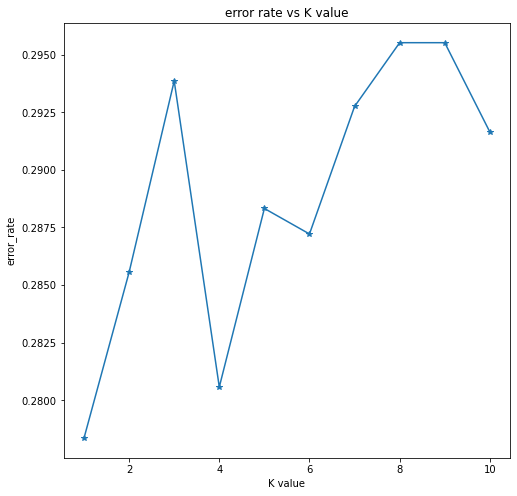

In [90]:
plt.figure(figsize = (8,8))
plt.plot(range(1,11),error_rate,marker = '*')
plt.title('error rate vs K value')
plt.xlabel('K value')
plt.ylabel('error_rate')
plt.show()

In [91]:
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(x_train,y_train)
y_pred_knn = KNN.predict(x_test)
y_pred_knntrain = KNN.predict(x_train)

In [92]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.76      0.62      0.68       914
           1       0.67      0.80      0.73       893

    accuracy                           0.71      1807
   macro avg       0.71      0.71      0.70      1807
weighted avg       0.71      0.71      0.70      1807



In [93]:
# Training Accuracy
print(classification_report(y_train,y_pred_knntrain))

              precision    recall  f1-score   support

           0       0.90      0.80      0.84      3603
           1       0.82      0.91      0.86      3624

    accuracy                           0.85      7227
   macro avg       0.86      0.85      0.85      7227
weighted avg       0.86      0.85      0.85      7227



## Hyperparameter tuning for Decision tree

In [94]:
from sklearn.model_selection import GridSearchCV

# Hyper parameters for decision tree
params = {
    'criterion':('ginni','entropy'),
    'splitter':('best','random'),
    'max_depth':(list(range(1,20))),
    'min_samples_split':(list(range(1,20))),
    'min_samples_leaf':(list(range(1,20)))
}

rfc = DecisionTreeClassifier(random_state=23)
rfc_cv = GridSearchCV(rfc,params,verbose=2,n_jobs=-1,cv=5,scoring='accuracy')

rfc_cv.fit(x_train,y_train) # Training the data on GridSearchCV
best_parameters = rfc_cv.best_params_ # it will give us best parameters
# Printing the best parameters for further predictions
print('best_parameters:',best_parameters)

Fitting 5 folds for each of 27436 candidates, totalling 137180 fits
best_parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 6, 'min_samples_split': 13, 'splitter': 'random'}


In [117]:
rfcclassifier = DecisionTreeClassifier(criterion= 'entropy', max_depth= 15, min_samples_leaf= 6, min_samples_split= 13, splitter= 'random',random_state = 54)
rfcclassifier.fit(x_train,y_train)
y_predrfc = rfcclassifier.predict(x_test)
y_predrfc_train = rfcclassifier.predict(x_train)

In [118]:
# Testing Accuracy
print(classification_report(y_test,y_predrfc))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73       914
           1       0.73      0.71      0.72       893

    accuracy                           0.73      1807
   macro avg       0.73      0.73      0.73      1807
weighted avg       0.73      0.73      0.73      1807



In [119]:
# Training Accuracy
print(classification_report(y_train,y_predrfc_train))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      3603
           1       0.80      0.76      0.78      3624

    accuracy                           0.79      7227
   macro avg       0.79      0.79      0.79      7227
weighted avg       0.79      0.79      0.79      7227



## Hyperparameter tuning for Random Forest

In [98]:
from sklearn.model_selection import RandomizedSearchCV

In [99]:
# Hyper parameters for Random Forest
param_grid = {
    'n_estimators':[400,600,800,1000,1200,1400,1600,1800,2000,2200],
    'max_depth':(list(range(1,13))),
    'min_samples_split':(list(range(1,9))),
    'min_samples_leaf':(list(range(1,6))),
    'max_features':['auto','sqrt'],
    'bootstrap':[True,False]}

rfclassifier = RandomForestClassifier(random_state=43)
rf_tree_rcv = RandomizedSearchCV(rfclassifier,param_grid,verbose=2,n_jobs=-1,cv=3,n_iter=200,scoring='accuracy')

rf_tree_rcv.fit(x_train,y_train) # Training the data on GridSearchCV

best_parameters1 = rf_tree_rcv.best_params_
# printing best parameters for further prediction
print('best parameters:',best_parameters1)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
best parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 12, 'bootstrap': False}


In [100]:
random_forest = RandomForestClassifier(n_estimators= 1000, min_samples_split= 5, min_samples_leaf= 1, max_features = 'sqrt', max_depth= 10, bootstrap= True)
random_forest.fit(x_train,y_train)
y_predRF = random_forest.predict(x_test)
y_predRF_train = random_forest.predict(x_train)

In [101]:
# Testing Accuracy
print(classification_report(y_test,y_predRF))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       914
           1       0.72      0.79      0.76       893

    accuracy                           0.75      1807
   macro avg       0.75      0.75      0.75      1807
weighted avg       0.75      0.75      0.75      1807



In [103]:
# Training Accuracy
print(classification_report(y_train,y_predRF_train))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      3603
           1       0.80      0.85      0.82      3624

    accuracy                           0.82      7227
   macro avg       0.82      0.82      0.82      7227
weighted avg       0.82      0.82      0.82      7227



## Using Bagging for Random Forest

In [104]:
from sklearn.ensemble import BaggingClassifier
model_bag = BaggingClassifier(base_estimator = rfc, n_estimators = 100,random_state = 87)
model_bag.fit(x_train,y_train)
y_pred_bag = model_bag.predict(x_test)
y_pred_bagtrain = model_bag.predict(x_train)

In [105]:
# Testing Accuracy
print(classification_report(y_test,y_pred_bag))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74       914
           1       0.74      0.74      0.74       893

    accuracy                           0.74      1807
   macro avg       0.74      0.74      0.74      1807
weighted avg       0.74      0.74      0.74      1807



In [106]:
# Training Accuracy
print(classification_report(y_train,y_pred_bagtrain))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3603
           1       0.99      0.98      0.99      3624

    accuracy                           0.99      7227
   macro avg       0.99      0.99      0.99      7227
weighted avg       0.99      0.99      0.99      7227



## Using Bagging for Logistic Regression

In [107]:
from sklearn.ensemble import BaggingClassifier
model_bag1 = BaggingClassifier(base_estimator = model, n_estimators = 100,random_state = 7)
model_bag1.fit(x_train,y_train)
y_pred_bag1 = model_bag.predict(x_test)
y_pred_bag1train = model_bag.predict(x_train)

In [108]:
# Testing Accuracy
print(classification_report(y_test,y_pred_bag1))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74       914
           1       0.74      0.74      0.74       893

    accuracy                           0.74      1807
   macro avg       0.74      0.74      0.74      1807
weighted avg       0.74      0.74      0.74      1807



In [109]:
# Training Accuracy
print(classification_report(y_train,y_pred_bag1train))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3603
           1       0.99      0.98      0.99      3624

    accuracy                           0.99      7227
   macro avg       0.99      0.99      0.99      7227
weighted avg       0.99      0.99      0.99      7227



## GB : Gradient Boosting

In [110]:
from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier() 
gbr.fit(x_train,y_train)
y_pred_gb = gbr.predict(x_test)
y_pred_gbtrain = gbr.predict(x_train)

In [111]:
# Testing Accuracy
print(classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74       914
           1       0.73      0.79      0.76       893

    accuracy                           0.75      1807
   macro avg       0.75      0.75      0.75      1807
weighted avg       0.75      0.75      0.75      1807



In [112]:
# Training Accuracy
print(classification_report(y_train,y_pred_gbtrain))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      3603
           1       0.76      0.79      0.78      3624

    accuracy                           0.77      7227
   macro avg       0.77      0.77      0.77      7227
weighted avg       0.77      0.77      0.77      7227



## XGB

In [113]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 34)
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)

In [114]:
# Testing Accuracy
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       914
           1       0.76      0.78      0.77       893

    accuracy                           0.77      1807
   macro avg       0.77      0.77      0.77      1807
weighted avg       0.77      0.77      0.77      1807



In [115]:
y_pred_train = xgb.predict(x_train)

In [116]:
# Training Accuracy
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      3603
           1       0.88      0.88      0.88      3624

    accuracy                           0.88      7227
   macro avg       0.88      0.88      0.88      7227
weighted avg       0.88      0.88      0.88      7227



In [120]:
my_dictionary = {'Model':['Logistic regression','Naive Bayes','Decision Tree','Random Forest','SVC','KNN','Tuning for Decision Tree',
                         'Tuning for Random Forest','Bagging for Random Forest','Bagging for Logistic Regression','Gradient Boosting','XGB'],
                'Testing Accuracy':[0.72,0.67,0.71,0.76,0.67,0.71,0.73,0.75,0.74,0.74,0.75,0.77],
                'Training Accuracy':[0.72,0.67,0.99,0.99,0.66,0.85,0.79,0.82,0.99,0.99,0.77,0.88]}

In [122]:
Scores = pd.DataFrame(my_dictionary)
Scores

,Model,Testing Accuracy,Training Accuracy
0,Logistic regression,0.72,0.72
1,Naive Bayes,0.67,0.67
2,Decision Tree,0.71,0.99
3,Random Forest,0.76,0.99
4,SVC,0.67,0.66
5,KNN,0.71,0.85
6,Tuning for Decision Tree,0.73,0.79
7,Tuning for Random Forest,0.75,0.82
8,Bagging for Random Forest,0.74,0.99
9,Bagging for Logistic Regression,0.74,0.99


# Conclusion: 

Task 1: Data Exploration insights - Sales effectiveness

Exploratory Data Analysis and insights are given above.

Task 2: ML model to predict the Lead Category (High Potential, Low Potential)
After data preprocessing the data was trained and tested by different ML models.

I have used different techniques that are Normal approach then performed Hyperparameter tuning when model was overfitting or underfitting and Boosting.

Logistic Regression did performed moderately on training as well as testing data. so I used bagging to logistic regression after that it performed better but that was not sufficient for us.

Naive Bayes and SVC did not performed well on training as well as testing data.

Decision Tree also performed moderately on both training and testing data. Then I did Hyperparameter tuning for decision tree but then performence of the model incresed by 2%.

Random Forest performed well on both training and testing data but it looks overfitted, to generalize the model I did hyperparameter tuning for random forest but model's performance decreased by 1% but good thing is it is generalized model.

KNN model also a moderate performer.

Bagging for Random Forest and Logistic Regression gives us the same results.

Gradient Boosting performed well on both training and testing data that is 75% testing accuracy and 77% training accuracy

Extreme Gradient Boosting [XGB] Gives us Highest accuracy score for both training data and testing data that is 77% testing accuracy and 88% training accuracy.

XGB model is the generalized and high performed Model among all of them.